# Part 2.

# Import libraires


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import mean_absolute_error

### Load Data

In [3]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6349, 64)
Testing Feature Size:   (2722, 64)
Training Labels Size:   (6349, 1)
Testing Labels Size:    (2722, 1)


In [32]:
train_features.head(12)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Natural Gas Use (therms),...,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,12501,4848195,186300.0,1951,5,100,14.9,4.0,0.0,1457.0,...,False,False,False,False,False,False,False,False,False,False
1,3690,2720953,163763.0,1971,1,100,79.9,14.3,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,5353,3481467,257760.0,1963,1,100,65.4,4.8,0.5,125665.5,...,False,False,False,False,False,False,False,False,False,False
3,14682,2810295,69504.0,1954,1,100,79.0,NaN,0.7,48773.9,...,False,False,False,False,False,False,False,False,False,False
4,7140,2774273,55210.0,1924,1,100,110.1,4.7,1.0,68564.4,...,False,False,False,False,False,False,False,False,False,False
5,756,4495647,137500.0,1990,1,100,35.8,8.7,0.1,7397.0,...,False,False,False,False,False,False,False,False,False,False
6,10202,3579625,65500.0,1927,1,100,132.7,30.8,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
7,4100,2817503,89400.0,1956,1,100,27.2,5.2,0.0,3071.5,...,False,False,False,False,False,False,False,False,False,False
8,13193,2817601,66924.0,1959,1,100,105.7,4.9,0.9,63494.3,...,False,False,False,False,False,False,False,False,False,False
9,9039,2797003,113604.0,1935,1,100,60.5,2.9,0.6,71742.4,...,False,False,False,False,False,False,False,False,False,False


# Evaluating and Comparing Machine Learning Models


In this segment, we will develop, train, and assess various machine learning approaches for our supervised regression project. The goal is to identify which model shows the most potential for additional refinement, such as tuning hyperparameters.

We are evaluating the models based on the mean absolute error. A baseline model that predicted the median score value had an average error of 25 points.

## Imputing Missing Values

In [4]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)  # Assuming 'train_features' is defined elsewhere in your code

# Now you can transform the training set:
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)


In [34]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [35]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Scaling Features


In [5]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [37]:
number_of_features = X.shape[1] 
print("Number of features:", number_of_features)

Number of features: 64


In [7]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

## Models to Evaluate

We will compare:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. K-Nearest Neighbors Regression


In [39]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [40]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 12.6928


In [41]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.2213


In [42]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.4664


In [43]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 11.9303


Text(0.5, 1.0, 'Model Comparison on Test MAE')

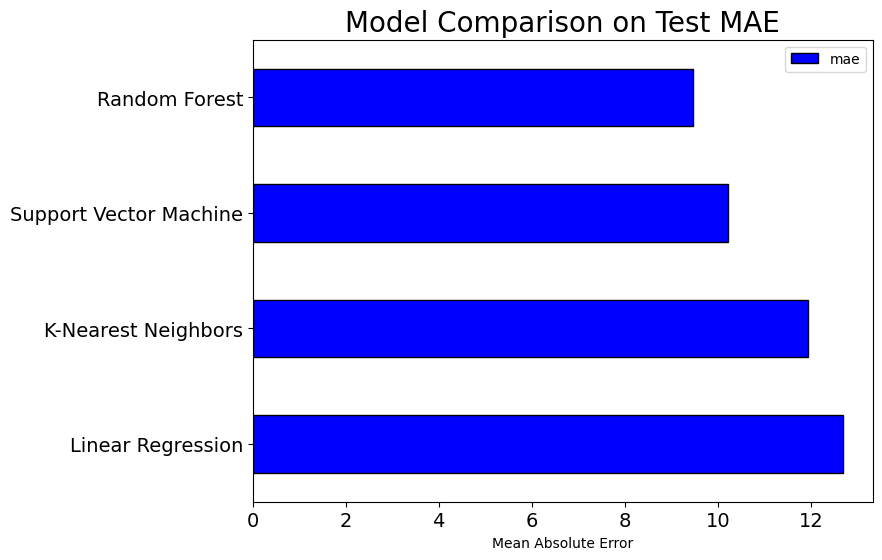

In [44]:
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

We can see all the model selected using default hyper-parameter performed well than the baseline. We choose Random Forest model to fine-tuning the hyper-parameter. 

## Hyperparameter Tuning using Cross Validation 

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000, 2000, 5000], 
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
    'bootstrap': [True, False],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2]
}


In [63]:
import warnings
warnings.filterwarnings('ignore')

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=10,
                                   verbose=1,
                                   n_jobs=-1,
                                   scoring = 'neg_mean_absolute_error',
                                   return_train_score=True,
                                   random_state=42)
random_search.fit(X, y)
print("Best parameters:", random_search.best_params_)
print("Best score (MAE):", random_search.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_features': 'sqrt', 'max_depth': 20, 'ccp_alpha': 0.04, 'bootstrap': False}
Best score (MAE): -11.002536156806041


In [64]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_features,param_max_depth,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,4.776709,0.062438,0.044198,0.006241,500,2,8,0.0,sqrt,30,...,-11.519180,-11.589220,-11.637741,-11.678521,-11.631812,-11.579388,-11.635468,-11.540657,-11.592047,0.050787
1,46.901130,0.428191,0.510145,0.032603,5000,10,1,0.1,sqrt,None,...,-9.194300,-9.116727,-9.111961,-9.161096,-9.111465,-9.167994,-9.157843,-9.127077,-9.153018,0.036996
2,3.576191,0.090216,0.046951,0.032064,500,5,6,0.0,log2,10,...,-13.215177,-13.449794,-13.286388,-13.325169,-13.355934,-13.261403,-13.169911,-13.342219,-13.303440,0.081634
3,17.083545,0.175010,0.118432,0.006814,1000,5,2,0.0,sqrt,50,...,-4.994714,-5.035059,-5.035205,-5.004103,-5.013117,-5.059189,-5.036575,-5.013941,-5.031810,0.027963
4,10.020856,0.204834,0.073662,0.013164,1000,2,6,0.2,sqrt,50,...,-12.189521,-11.999826,-11.999239,-11.953079,-11.940651,-11.910741,-12.175623,-12.012531,-12.017825,0.089202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.402185,0.114790,0.025704,0.003267,300,20,6,0.0,sqrt,None,...,-9.752383,-9.772934,-9.718462,-9.790970,-9.769335,-9.803590,-9.719063,-9.842109,-9.776839,0.046614
96,1.424539,0.085868,0.013079,0.002110,200,5,2,0.2,sqrt,None,...,-10.830357,-10.854317,-10.531120,-10.565373,-10.692581,-10.915612,-10.879311,-10.713410,-10.760839,0.126639
97,1.818780,0.385893,0.089498,0.234431,100,20,2,0.01,sqrt,50,...,-8.310630,-8.291282,-8.149139,-8.198296,-8.247292,-8.281386,-8.567248,-8.276786,-8.292413,0.111202
98,0.001081,0.000352,0.000000,0.000000,1000,5,1,0.01,auto,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
random_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_min_impurity_decrease', 'param_max_features', 'param_max_depth', 'param_ccp_alpha', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [66]:
random_results = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score', ascending = False)
random_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_features,param_max_depth,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
25,47.002627,3.869928,0.137311,0.026547,1000,2,1,0.0,sqrt,20,...,-2.640303,-2.674819,-2.661627,-2.671943,-2.640378,-2.657320,-2.634775,-2.634012,-2.644778,0.021072
74,14.709755,0.204488,0.155432,0.016971,1000,5,2,0.0,sqrt,50,...,-4.218824,-4.268777,-4.259665,-4.228244,-4.245873,-4.290769,-4.276535,-4.256972,-4.265565,0.034785
3,17.083545,0.175010,0.118432,0.006814,1000,5,2,0.0,sqrt,50,...,-4.994714,-5.035059,-5.035205,-5.004103,-5.013117,-5.059189,-5.036575,-5.013941,-5.031810,0.027963
32,9.516758,0.386394,0.072518,0.011685,500,5,1,0.0,log2,30,...,-3.170140,-3.169370,-3.170283,-3.175679,-3.167737,-3.166485,-3.163237,-3.165524,-3.167534,0.005320
93,4.495240,0.124965,0.044067,0.017164,300,20,1,0.0,sqrt,20,...,-6.971015,-6.945112,-6.971430,-6.938394,-6.974000,-6.930691,-6.993441,-6.941648,-6.965444,0.029813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.001092,0.000313,0.000000,0.000000,300,5,2,0.01,auto,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0.000889,0.000163,0.000000,0.000000,100,20,6,0.0,auto,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,0.001716,0.001340,0.000000,0.000000,1000,5,2,0.01,auto,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.001353,0.001019,0.000000,0.000000,100,20,4,0.0,auto,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Performance vs Number of Estimators')

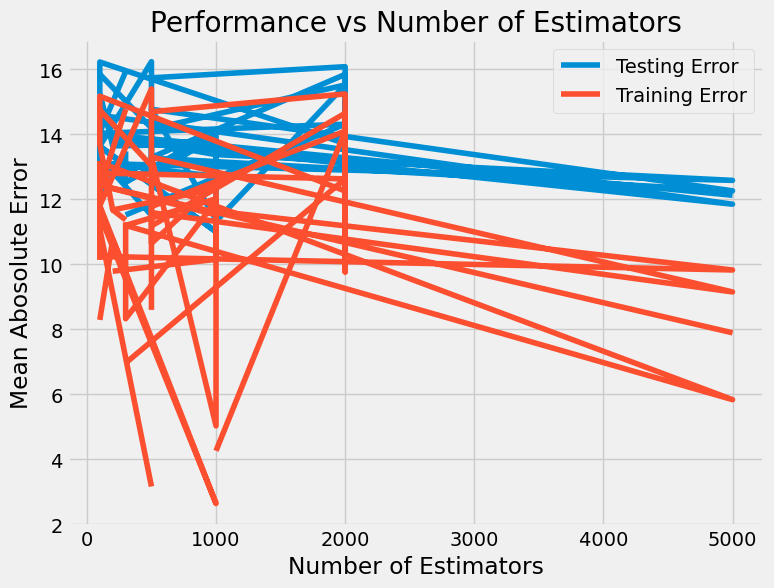

In [71]:
# Get the results into a dataframe
results = pd.DataFrame(random_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Estimators') 
plt.ylabel('Mean Abosolute Error')
plt.legend()
plt.title('Performance vs Number of Estimators')

From the plot, it is very hard to analyze the error polt since we use random search here, so it is jumped around.

In [73]:
best_model = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_features='sqrt',
    max_depth=20,
    ccp_alpha=0.04,
    bootstrap=False,
    random_state=42
)


# Test if overfitting

In [74]:
best_model.fit(X, y)

train_predictions = best_model.predict(X)
test_predictions = best_model.predict(X_test)

train_error = mean_absolute_error(y, train_predictions)
test_error = mean_absolute_error(y_test, test_predictions)

In [75]:
print(f'Train Error: {train_error}')
print(f'Test Error: {test_error}')


Train Error: 2.8548932813978407
Test Error: 10.819784244450767


# Solve Overfitting

## Try to use bootstrap method.

In [76]:
bootstrap_tree = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_features='sqrt',
    max_depth=20,
    ccp_alpha=0.04,
    bootstrap=True,
    random_state=42
)

In [77]:
bootstrap_tree.fit(X, y)

train_predictions = bootstrap_tree.predict(X)
test_predictions = bootstrap_tree.predict(X_test)

train_error = mean_absolute_error(y, train_predictions)
test_error = mean_absolute_error(y_test, test_predictions)

print(f'Train Error: {train_error}')
print(f'Test Error: {test_error}')


Train Error: 5.359177797503895
Test Error: 11.148087893951873


We can see the overfitting still severe, so we need to take other operations.


# Try to "Cut Down" the depth of the tree

In [98]:
bootstrap_tree_depth = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_features='sqrt',
    max_depth=20,
    ccp_alpha=0.04,
    bootstrap=True,
    random_state=42
)

In [101]:
for depth in range(1, 21):
    bootstrap_tree_depth.set_params(max_depth=depth)
    bootstrap_tree_depth.fit(X, y)
    train_predictions = bootstrap_tree_depth.predict(X)
    test_predictions = bootstrap_tree_depth.predict(X_test)
    train_error = mean_absolute_error(y, train_predictions)
    test_error = mean_absolute_error(y_test, test_predictions)
    print(f'Depth: {depth} Train Error: {train_error} Test Error: {test_error}')

Depth: 1 Train Error: 21.779734714077513 Test Error: 21.41429016738889
Depth: 2 Train Error: 19.934981172168598 Test Error: 19.70012344277487
Depth: 3 Train Error: 18.36252566100329 Test Error: 18.23107367827663
Depth: 4 Train Error: 17.079874306901367 Test Error: 17.05949710962018
Depth: 5 Train Error: 15.828558391749228 Test Error: 15.973734551076024
Depth: 6 Train Error: 14.771677844822761 Test Error: 15.122487510849577
Depth: 7 Train Error: 13.777051932047781 Test Error: 14.4564980215771
Depth: 8 Train Error: 12.689604202496383 Test Error: 13.761392426409163
Depth: 9 Train Error: 11.684783428131562 Test Error: 13.207411577780325
Depth: 10 Train Error: 10.664524853689088 Test Error: 12.695273750169145
Depth: 11 Train Error: 9.73823862438521 Test Error: 12.295045455223335
Depth: 12 Train Error: 8.84315504973793 Test Error: 11.981442438124084
Depth: 13 Train Error: 8.046010569319963 Test Error: 11.691868506518029
Depth: 14 Train Error: 7.3792994596157335 Test Error: 11.516493943716183

In [87]:
import matplotlib.pyplot as plt

depths = list(range(1, 19))

train_errors = [
    21.779734714077513, 19.934981172168598, 18.36252566100329, 17.079874306901367,
    15.828558391749228, 14.771677844822761, 13.777051932047781, 12.689604202496383,
    11.684783428131562, 10.664524853689088, 9.73823862438521, 8.84315504973793,
    8.046010569319963, 7.3792994596157335, 6.821385414469485, 6.360140785092646,
    5.997862865560216, 5.71391159979367
]

test_errors = [
    21.41429016738889, 19.70012344277487, 18.23107367827663, 17.05949710962018,
    15.973734551076024, 15.122487510849577, 14.4564980215771, 13.761392426409163,
    13.207411577780325, 12.695273750169145, 12.295045455223335, 11.981442438124084,
    11.691868506518029, 11.516493943716183, 11.366958054493006, 11.29989820760348,
    11.240968538496944, 11.178558362426866
]


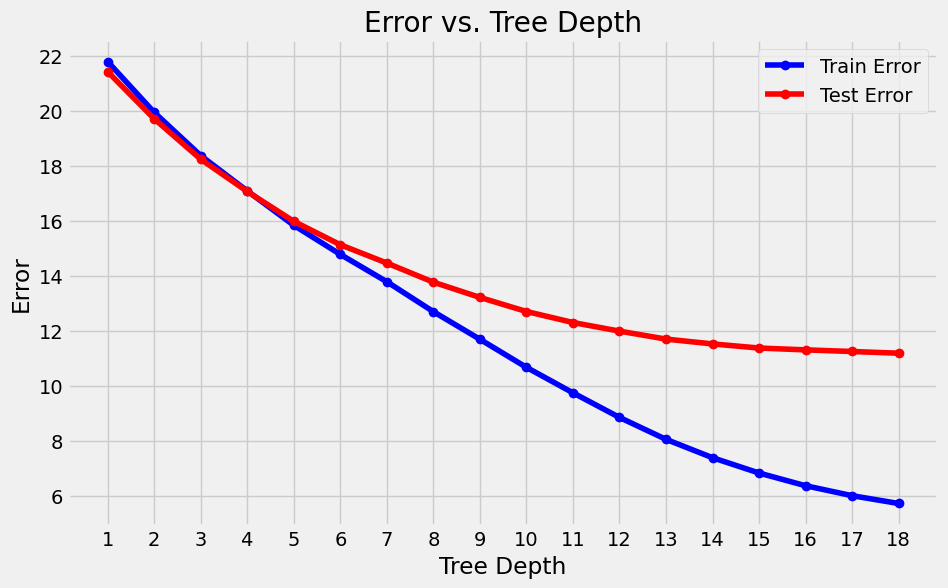

In [89]:
plt.figure(figsize=(10, 6)) 
plt.plot(depths, train_errors, marker='o', color='blue', label='Train Error')
plt.plot(depths, test_errors, marker='o', color='red', label='Test Error')


plt.xticks(ticks=depths)  
plt.title('Error vs. Tree Depth') 
plt.xlabel('Tree Depth')  
plt.ylabel('Error')  
plt.legend()  
plt.grid(True)  
plt.show()


We can see from depth of 6, the overfitting occurs, so choose the depth of 5 and we need to optimize it. 

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


bootstrap_tree_leaf_number = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_features='sqrt',
    max_depth=5,
    ccp_alpha=0.04,
    bootstrap=True,
    random_state=42
)

bootstrap_tree_leaf_number.fit(X, y)

train_predictions = bootstrap_tree_leaf_number.predict(X)
train_mae = mean_absolute_error(y, train_predictions)


test_predictions = bootstrap_tree_leaf_number.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)

cv_scores = cross_val_score(bootstrap_tree_leaf_number, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Cross-validated MAE: {-cv_scores.mean()}')

if train_mae < test_mae:
    print("Possible overfitting")
else:
    print("Not obviously overfitting")


Training MAE: 15.828558391749228
Test MAE: 15.973734551076024
Cross-validated MAE: 16.25593093721083
Possible overfitting


# Add min_samples_leaf number

增加 min_samples_split 和 min_samples_leaf：这些参数的增加可以要求树在节点分裂或形成叶节点时拥有更多的样本，这有助于平滑模型的学习曲线，减少对噪声的敏感性。
调整 max_features：减少每个分裂考虑的特征数量，可以提高树之间的差异性，增加模型的泛化能力。
调整 ccp_alpha：增加 ccp_alpha 以增强剪枝强度，从而去除不必要的复杂性。

Try to increase the min_samples_leaf_number, 

In [91]:
bootstrap_tree_leaf_number = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_features='sqrt',
    max_depth=5,
    ccp_alpha=0.04,
    bootstrap=True,
    random_state=42
)

## Test on a rough estimate on the min_samples_leaf_options, the task is to explore the effect on the error as the min_samples_leaf_options increase.

In [104]:
min_samples_leaf_options = [1, 2, 5, 10, 15, 20, 25, 30, 50]

cv_scores = []

for min_samples in min_samples_leaf_options:
    # Create a new model instance with the current min_samples_leaf
    model = RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        min_samples_leaf=min_samples,
        min_impurity_decrease=0.0,
        max_features='sqrt',
        max_depth=5,
        ccp_alpha=0.04,
        bootstrap=True,
        random_state=42
    )
    
    model.fit(X, y)
    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)
    train_error = mean_absolute_error(y, train_predictions)
    test_error = mean_absolute_error(y_test, test_predictions)
    print(f'min_samples_leaf: {min_samples} Train Error: {train_error} Test Error: {test_error}')



min_samples_leaf: 1 Train Error: 15.828558391749228 Test Error: 15.973734551076024
min_samples_leaf: 2 Train Error: 15.876335511664081 Test Error: 16.00029384410015
min_samples_leaf: 5 Train Error: 15.976758085459222 Test Error: 16.096127704183957
min_samples_leaf: 10 Train Error: 16.065159573026847 Test Error: 16.153003523873494
min_samples_leaf: 15 Train Error: 16.15236460833002 Test Error: 16.217128921269193
min_samples_leaf: 20 Train Error: 16.16983057461303 Test Error: 16.218526467348326
min_samples_leaf: 25 Train Error: 16.2971398122716 Test Error: 16.338852075066168
min_samples_leaf: 30 Train Error: 16.497576269291457 Test Error: 16.522427428318387
min_samples_leaf: 50 Train Error: 16.676278522031648 Test Error: 16.667679624587205


Draw the graph.

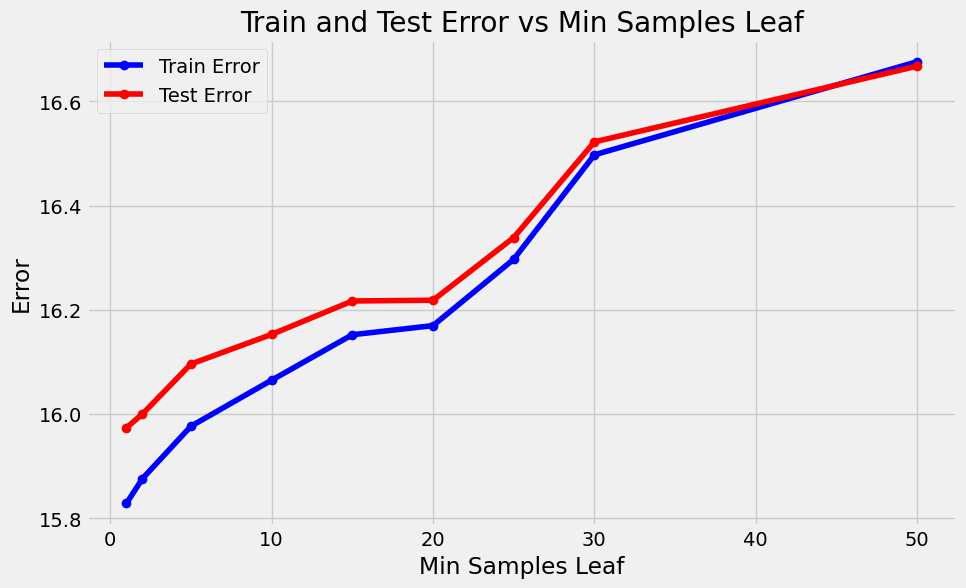

In [106]:
min_samples_leaf_options = [1, 2, 5, 10, 15, 20, 25, 30, 50]

train_errors = [
    15.828558391749228,
15.876335511664081,
15.976758085459222,
16.065159573026847,
16.15236460833002,
16.16983057461303,
16.2971398122716,
16.497576269291457,
16.676278522031648
]
test_errors = [
15.973734551076024,
16.00029384410015,
16.096127704183957,
 16.153003523873494,
16.217128921269193,
16.218526467348326,
 16.338852075066168,
 16.522427428318387,
 16.667679624587205
]


plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_options, train_errors, marker='o', label='Train Error', color='blue')
plt.plot(min_samples_leaf_options, test_errors, marker='o', label='Test Error', color='red')

plt.title('Train and Test Error vs Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


From the polt, as the min_samples_leaf increase, the error is incrasing, however, at 50, the test error begin to be smaller than train error. That indicates the possible of solving overfitting. Thus, we need to further exploration. 

In [107]:
min_samples_leaf_options = [40, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]

cv_scores = []

for min_samples in min_samples_leaf_options:
    # Create a new model instance with the current min_samples_leaf
    model = RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        min_samples_leaf=min_samples,
        min_impurity_decrease=0.0,
        max_features='sqrt',
        max_depth=5,
        ccp_alpha=0.04,
        bootstrap=True,
        random_state=42
    )
    
    model.fit(X, y)
    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)
    train_error = mean_absolute_error(y, train_predictions)
    test_error = mean_absolute_error(y_test, test_predictions)
    print(f'min_samples_leaf: {min_samples} Train Error: {train_error} Test Error: {test_error}')

min_samples_leaf: 40 Train Error: 16.596599983260358 Test Error: 16.603498983763018
min_samples_leaf: 50 Train Error: 16.676278522031648 Test Error: 16.667679624587205
min_samples_leaf: 51 Train Error: 16.70794499964777 Test Error: 16.69317446556408
min_samples_leaf: 52 Train Error: 16.73834879143526 Test Error: 16.72318254031248
min_samples_leaf: 53 Train Error: 16.76205228714972 Test Error: 16.74524515794975
min_samples_leaf: 54 Train Error: 16.77131901151177 Test Error: 16.75367501613438
min_samples_leaf: 55 Train Error: 16.803435589925762 Test Error: 16.781131761473784
min_samples_leaf: 56 Train Error: 16.79848123965877 Test Error: 16.776889001146493
min_samples_leaf: 57 Train Error: 16.821628508156042 Test Error: 16.796814274745785
min_samples_leaf: 58 Train Error: 16.837718362052527 Test Error: 16.809976641866026
min_samples_leaf: 59 Train Error: 16.83221138925163 Test Error: 16.802334655973695
min_samples_leaf: 60 Train Error: 16.81209205754919 Test Error: 16.779564698810482
min

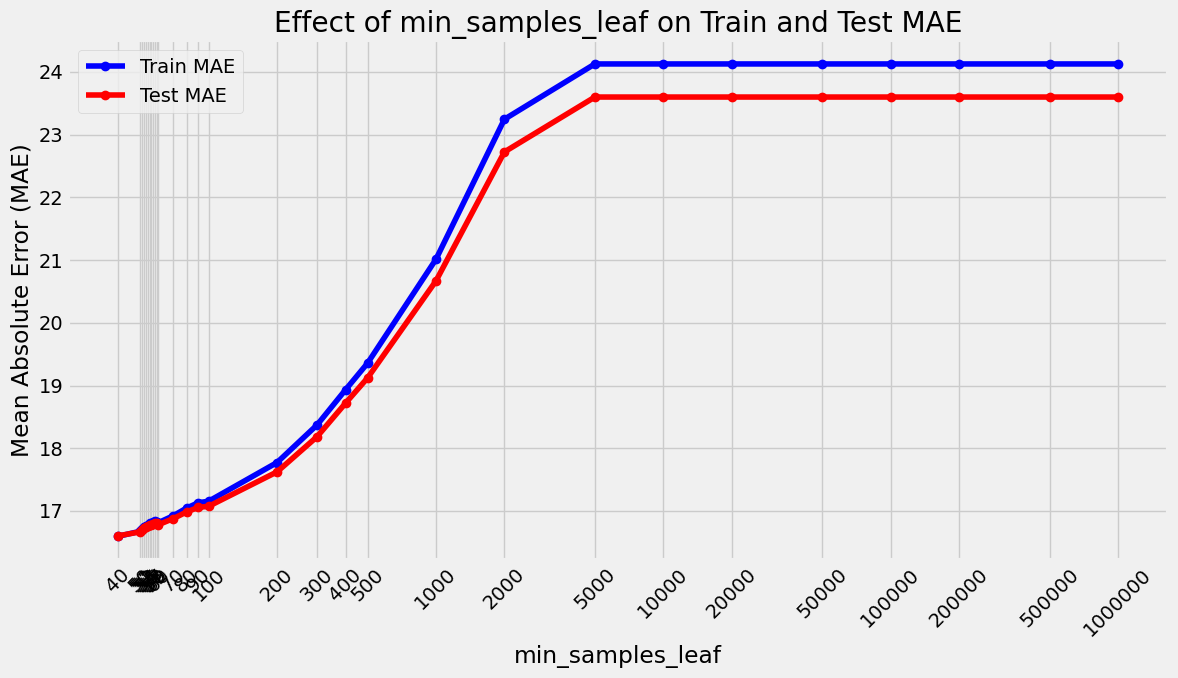

In [108]:
# Provided model performance data for min_samples_leaf values
min_samples_leaf_values = [
    40, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 70, 80, 90, 100, 
    200, 300, 400, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 
    200000, 500000, 1000000
]
train_errors = [
    16.596599983260358, 16.676278522031648, 16.70794499964777, 16.73834879143526, 
    16.76205228714972, 16.77131901151177, 16.803435589925762, 16.79848123965877, 
    16.821628508156042, 16.837718362052527, 16.83221138925163, 16.81209205754919, 
    16.92459750712794, 17.04638284597878, 17.131128077129084, 17.15554542916572, 
    17.772589442317596, 18.37214519225498, 18.93172926099611, 19.35604498511029, 
    21.01332525645386, 23.245727596877916, 24.127063639063863, 24.127063639063863, 
    24.127063639063863, 24.127063639063863, 24.127063639063863, 24.127063639063863, 
    24.127063639063863, 24.127063639063863
]
test_errors = [
    16.603498983763018, 16.667679624587205, 16.69317446556408, 16.72318254031248, 
    16.74524515794975, 16.75367501613438, 16.781131761473784, 16.776889001146493, 
    16.796814274745785, 16.809976641866026, 16.802334655973695, 16.779564698810482, 
    16.879521713601775, 16.98470826992516, 17.056623715629758, 17.074540882660678, 
    17.623666410538107, 18.1848297750342, 18.718114434823416, 19.120650376434806, 
    20.66784186101301, 22.724542664678296, 23.599594051097625, 23.599594051097625, 
    23.599594051097625, 23.599594051097625, 23.599594051097625, 23.599594051097625, 
    23.599594051097625, 23.599594051097625
]

# Plot the results
plt.figure(figsize=(12, 7))
plt.plot(min_samples_leaf_values, train_errors, marker='o', label='Train MAE', color='blue')
plt.plot(min_samples_leaf_values, test_errors, marker='o', label='Test MAE', color='red')

plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.xticks(min_samples_leaf_values, labels=min_samples_leaf_values, rotation=45)  # Set x-axis labels to actual values
plt.title('Effect of min_samples_leaf on Train and Test MAE')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


We need to look at the detail on the 50 - 100. 

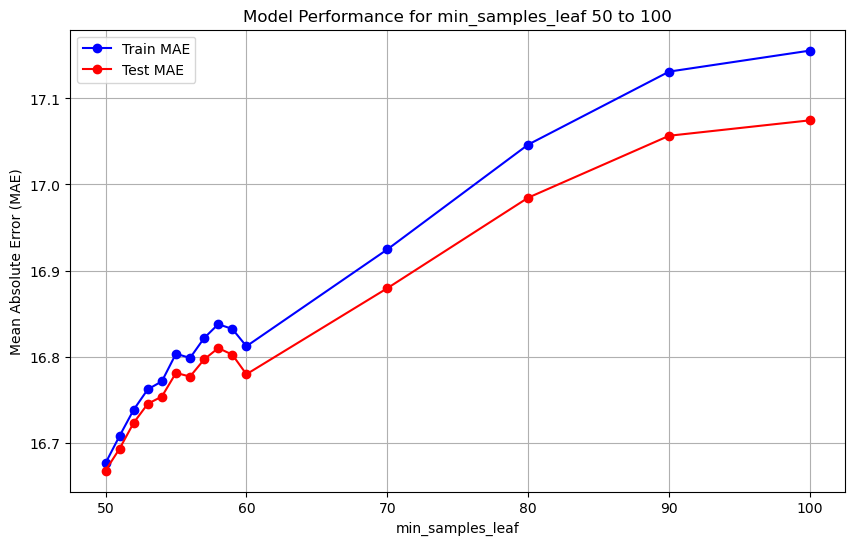

In [7]:
# Updated model performance data for min_samples_leaf values from 50 to 100
min_samples_leaf_values = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 70, 80, 90, 100]
train_errors = [
    16.676278522031648, 16.70794499964777, 16.73834879143526, 
    16.76205228714972, 16.77131901151177, 16.803435589925762, 
    16.79848123965877, 16.821628508156042, 16.837718362052527, 
    16.83221138925163, 16.81209205754919, 16.92459750712794, 
    17.04638284597878, 17.131128077129084, 17.15554542916572
]
test_errors = [
    16.667679624587205, 16.69317446556408, 16.72318254031248, 
    16.74524515794975, 16.75367501613438, 16.781131761473784, 
    16.776889001146493, 16.796814274745785, 16.809976641866026, 
    16.802334655973695, 16.779564698810482, 16.879521713601775, 
    16.98470826992516, 17.056623715629758, 17.074540882660678
]

plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_errors, marker='o', label='Train MAE', color='blue')
plt.plot(min_samples_leaf_values, test_errors, marker='o', label='Test MAE', color='red')

plt.title('Model Performance for min_samples_leaf 50 to 100')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

From the plot, we can see from 50 to 100, errors incrase, however, at point 58 to 60, the errors drop a litte, so indiciates it generalize better. And it amplifies the variance between training error and test error.

### Futher exploration on the 60 - 70 of min_samples_leaf.

In [15]:
min_samples_leaf_options = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]

cv_scores = []

for min_samples in min_samples_leaf_options:
    # Create a new model instance with the current min_samples_leaf
    model = RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        min_samples_leaf=min_samples,
        min_impurity_decrease=0.0,
        max_features='sqrt',
        max_depth=5,
        ccp_alpha=0.04,
        bootstrap=True,
        random_state=42
    )
  
    model.fit(X, y)
    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)
    train_error = mean_absolute_error(y, train_predictions)
    test_error = mean_absolute_error(y_test, test_predictions)
    print(f'min_samples_leaf: {min_samples} Train Error: {train_error} Test Error: {test_error}')

min_samples_leaf: 60 Train Error: 16.81209205754919 Test Error: 16.779564698810482
min_samples_leaf: 61 Train Error: 16.82855176941481 Test Error: 16.793991926332655
min_samples_leaf: 62 Train Error: 16.83010618604103 Test Error: 16.792200044267016
min_samples_leaf: 63 Train Error: 16.846221587968884 Test Error: 16.809748324763778
min_samples_leaf: 64 Train Error: 16.880936962287873 Test Error: 16.83987897314867
min_samples_leaf: 65 Train Error: 16.887200292376782 Test Error: 16.846680137930655
min_samples_leaf: 66 Train Error: 16.884921577467864 Test Error: 16.842459761214634
min_samples_leaf: 67 Train Error: 16.902127471552838 Test Error: 16.861712506914017
min_samples_leaf: 68 Train Error: 16.906254423778545 Test Error: 16.865022112462437
min_samples_leaf: 69 Train Error: 16.883530662288532 Test Error: 16.837134892084034
min_samples_leaf: 70 Train Error: 16.92459750712794 Test Error: 16.879521713601775


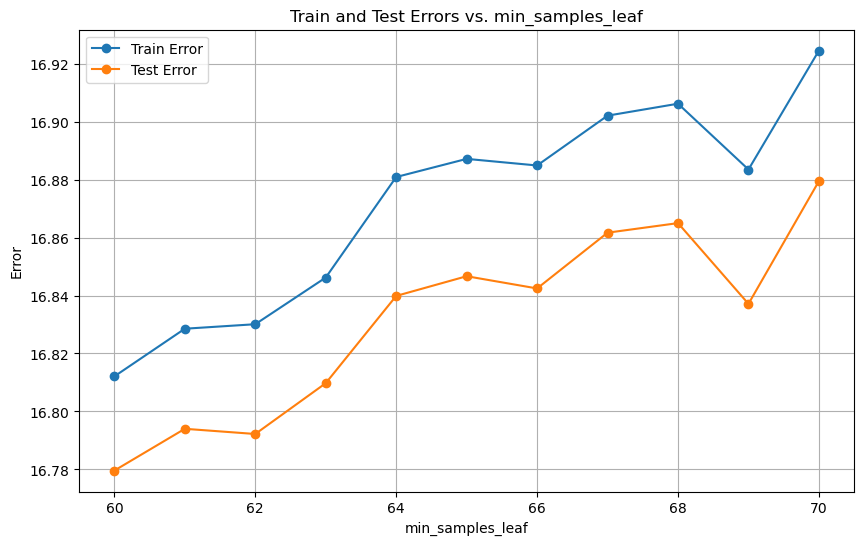

In [16]:
import matplotlib.pyplot as plt

# 数据
min_samples_leaf = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
train_error = [16.81209205754919, 16.82855176941481, 16.83010618604103, 16.846221587968884, 16.880936962287873, 16.887200292376782, 16.884921577467864, 16.902127471552838, 16.906254423778545, 16.883530662288532, 16.92459750712794]
test_error = [16.779564698810482, 16.793991926332655, 16.792200044267016, 16.809748324763778, 16.83987897314867, 16.846680137930655, 16.842459761214634, 16.861712506914017, 16.865022112462437, 16.837134892084034, 16.879521713601775]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf, train_error, marker='o', label='Train Error')
plt.plot(min_samples_leaf, test_error, marker='o', label='Test Error')
plt.xlabel('min_samples_leaf')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. min_samples_leaf')
plt.legend()
plt.grid(True)
plt.show()


From the plot we can see, the 60 min_samples_leaf indicates the lowest error on train and test error, after that, error incrases, so 60 may be the optimal value. 

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


bootstrap_tree_leaf_number = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=60,
    min_impurity_decrease=0.0,
    max_features='sqrt',
    max_depth=5,
    ccp_alpha=0.04,
    bootstrap=True,
    random_state=42
)

bootstrap_tree_leaf_number.fit(X, y)

train_predictions = bootstrap_tree_leaf_number.predict(X)
train_mae = mean_absolute_error(y, train_predictions)


test_predictions = bootstrap_tree_leaf_number.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)

cv_scores = cross_val_score(bootstrap_tree_leaf_number, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Cross-validated MAE: {-cv_scores.mean()}')

if train_mae < test_mae:
    print("Possible overfitting")
else:
    print("Not obviously overfitting")


Training MAE: 16.81209205754919
Test MAE: 16.779564698810482
Cross-validated MAE: 17.22485486947334
Not obviously overfitting


Now we can see we decrease the overfitting under the hood!

# Try to explore the different max_features_values effects

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np


max_features_values = [0.1, 0.3, 0.5, 'sqrt', 'log2', None]
# Initialize lists to store the results
train_errors = []
test_errors = []
cv_errors = []


# Loop over the values for max_features
for max_features in max_features_values:
    # Initialize the RandomForestRegressor with the current max_features value
    model = RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        min_samples_leaf=60,
        min_impurity_decrease=0.0,
        max_features=max_features,
        max_depth=5,
        ccp_alpha=0.04,
        bootstrap=True,
        random_state=42
    )
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    cv_errors.append(-cv_scores.mean())
    
    # Fit the model to the training data
    model.fit(X, y)
    
    # Calculate and store the training error
    train_predictions = model.predict(X)
    train_error = mean_absolute_error(y, train_predictions)
    train_errors.append(train_error)
    
    # Calculate and store the test error
    test_predictions = model.predict(X_test)
    test_error = mean_absolute_error(y_test, test_predictions)
    test_errors.append(test_error)

# Output the errors for each max_features setting
for i, max_features in enumerate(max_features_values):
    print(f"max_features: {max_features}")
    print(f"  Train Error: {train_errors[i]}")
    print(f"  Test Error: {test_errors[i]}")
    print(f"  Cross-Validation Error: {cv_errors[i]}")

max_features: 0.1
  Train Error: 18.469883402684353
  Test Error: 18.363654548863835
  Cross-Validation Error: 18.763771988427774
max_features: 0.3
  Train Error: 13.245749179620926
  Test Error: 13.375377202181834
  Cross-Validation Error: 13.604542798228914
max_features: 0.5
  Train Error: 11.830453611802465
  Test Error: 12.082434752883337
  Cross-Validation Error: 12.225891676338017
max_features: sqrt
  Train Error: 16.81209205754919
  Test Error: 16.779564698810482
  Cross-Validation Error: 17.22485486947334
max_features: log2
  Train Error: 18.469883402684353
  Test Error: 18.363654548863835
  Cross-Validation Error: 18.763771988427774
max_features: None
  Train Error: 10.566256563769619
  Test Error: 10.958929824130557
  Cross-Validation Error: 10.960486585903643


From the test, we can see max_features is none performs the best, and it is not overfitting!

# Test on the min_samples_split effect

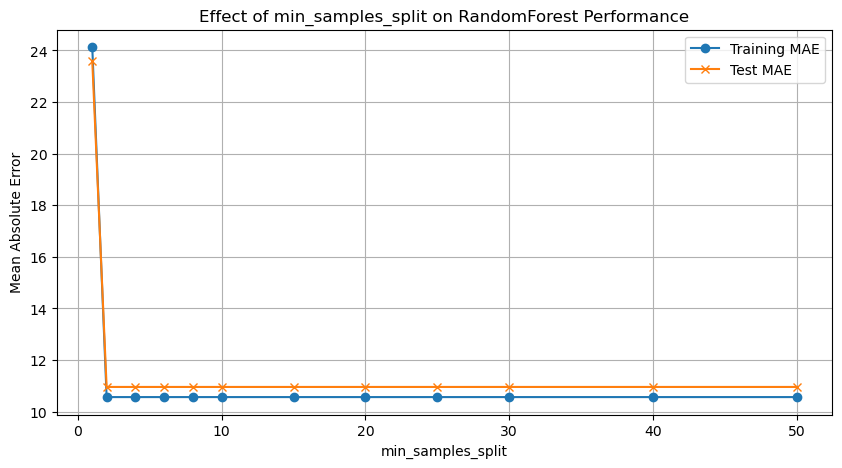

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 假设已经有了训练和测试数据：X_train, X_test, y_train, y_test

# 定义不同的min_samples_split值
min_samples_splits = [1.0, 2, 4, 6, 8, 10, 15, 20, 25, 30, 40, 50]

# 初始化存储结果的列表
train_errors = []
test_errors = []

# 遍历不同的min_samples_split值
for min_samples_split in min_samples_splits:
    model = RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=min_samples_split,
        min_samples_leaf=60,  # 保持其他参数固定
        min_impurity_decrease=0.0,
        max_features=None,
        max_depth=5,
        ccp_alpha=0.04,
        bootstrap=True,
        random_state=42
    )
    
    # 训练模型
    model.fit(X, y)
    
    # 在训练集和测试集上进行预测
    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)
    
    # 计算MAE
    train_mae = mean_absolute_error(y, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    # 保存结果
    train_errors.append(train_mae)
    test_errors.append(test_mae)

# 绘制结果
plt.figure(figsize=(10, 5))
plt.plot(min_samples_splits, train_errors, label='Training MAE', marker='o')
plt.plot(min_samples_splits, test_errors, label='Test MAE', marker='x')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Absolute Error')
plt.title('Effect of min_samples_split on RandomForest Performance')
plt.legend()
plt.grid(True)
plt.show()


As can see, the increase of min_samples_split since 2 does not decrease the error.

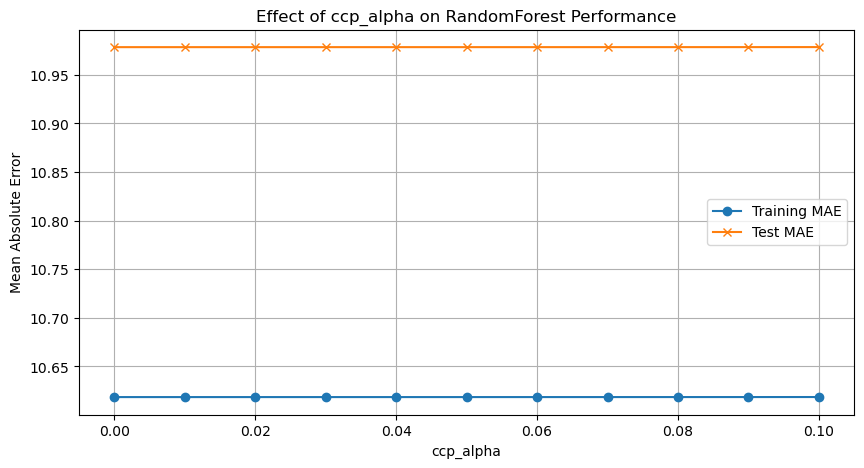

In [18]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

train_maes = []
test_maes = []
ccp_alpha_values = np.linspace(0.0, 0.1, 11) 

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for ccp_alpha in ccp_alpha_values:

    model.set_params(ccp_alpha=ccp_alpha)
    

    fold_train_maes = []
    fold_test_maes = []
    
    for train_index, test_index in kf.split(X):
      
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        model.fit(X_train_fold, y_train_fold)
        
        train_mae = mean_absolute_error(y_train_fold, model.predict(X_train_fold))
        test_mae = mean_absolute_error(y_test_fold, model.predict(X_test_fold))
        
        fold_train_maes.append(train_mae)
        fold_test_maes.append(test_mae)

    avg_train_mae = np.mean(fold_train_maes)
    avg_test_mae = np.mean(fold_test_maes)
    
    train_maes.append(avg_train_mae)
    test_maes.append(avg_test_mae)

plt.figure(figsize=(10, 5))
plt.plot(ccp_alpha_values, train_maes, label='Training MAE', marker='o')
plt.plot(ccp_alpha_values, test_maes, label='Test MAE', marker='x')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Effect of ccp_alpha on RandomForest Performance')
plt.legend()
plt.grid(True)
plt.show()


From the plot, we can see the ccp_alpha does not effect on the performance. 

# Test on the min_impurtiy effect

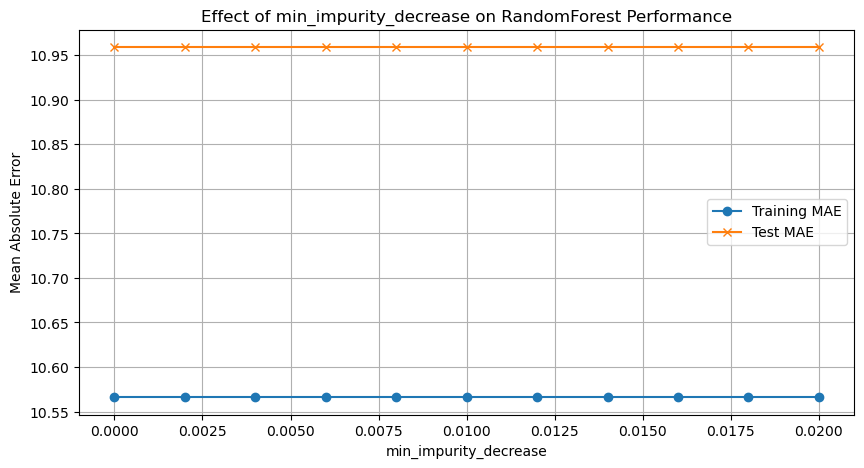

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 假设已经有了训练和测试数据：X_train, X_test, y_train, y_test

# 定义不同的min_impurity_decrease值
min_impurity_decreases = np.linspace(0.0, 0.02, 11)  # 从0.0到0.02，总共11个值

# 初始化存储结果的列表
train_errors = []
test_errors = []

# 遍历不同的min_impurity_decrease值
for min_impurity_decrease in min_impurity_decreases:
    model = RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        min_samples_leaf=60,  # 保持其他参数固定
        min_impurity_decrease=min_impurity_decrease,
        max_features=None,
        max_depth=5,
        ccp_alpha=0.04,
        bootstrap=True,
        random_state=42
    )
    
    # 训练模型
    model.fit(X, y)
    
    # 在训练集和测试集上进行预测
    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)
    
    # 计算MAE
    train_mae = mean_absolute_error(y, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    # 保存结果
    train_errors.append(train_mae)
    test_errors.append(test_mae)

# 绘制结果
plt.figure(figsize=(10, 5))
plt.plot(min_impurity_decreases, train_errors, label='Training MAE', marker='o')
plt.plot(min_impurity_decreases, test_errors, label='Test MAE', marker='x')
plt.xlabel('min_impurity_decrease')
plt.ylabel('Mean Absolute Error')
plt.title('Effect of min_impurity_decrease on RandomForest Performance')
plt.legend()
plt.grid(True)
plt.show()


From the testing, we can see the min_impurity_decrease does not effect the MAE.

# Final Model:

Therefore, our final model is:

bootstrap_tree_leaf_number = RandomForestRegressor(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=60,
    min_impurity_decrease=0.0,
    max_features=none,
    max_depth=5,
    ccp_alpha=0.04,
    bootstrap=True,
    random_state=42
)

With: 
  Train Error: 10.566256563769619
  Test Error: 10.958929824130557
  Cross-Validation Error: 10.960486585903643